In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import datetime as dt
import math as mt
# importing libraries
import statsmodels.api as sm
import pandas as pd 

### Data

In [2]:
df = pd.read_excel('Emhjellen_meteorological_Vestland_1991_2020.xlsx')
df= df.dropna()

In [3]:
year = df['Date'].dt.year
month = df['Date'].dt.month

In [4]:
df['Temp*Prec'] = df['Mean_daily_temp']*df['Daily_prec']

df['dummy_variable'] = 1

### Seasons

In [5]:
# rockfall climate, daily temp

# spring

march = df[month== 3]
april = df[month== 4]
may = df[month== 5]

spring = [march, april, may]
spring = pd.concat(spring)


# summer 

jun = df[month == 6]
jul = df[month == 7]
aug = df[month == 8]

summer = [jun, jul, aug]
summer = pd.concat(summer)


# autumn

sep = df[month == 9]
okt = df[month == 10]
nov = df[month == 11]

autumn = [sep, okt, nov]
autumn = pd.concat(autumn)

# winter

dec = df[month == 12]
jan = df[month == 1]
feb = df[month == 2]

winter = [dec, jan, feb]
winter = pd.concat(winter)

In [6]:
Seasons = [spring, summer, autumn, winter]

In [7]:
Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

In [8]:
Locations = [df[df['Location'] ==1], df[df['Location'] ==2],df[df['Location'] ==3], df[df['Location'] ==4], df[df['Location'] ==5], df[df['Location'] ==6], df[df['Location'] ==7],
            df[df['Location'] ==8], df[df['Location'] == 9], df[df['Location'] ==10], df[df['Location'] ==11], df[df['Location'] ==12],df[df['Location'] ==13],df[df['Location'] == 14],df[df['Location'] == 15],df[df['Location'] ==16]]

In [9]:
Months = [df[month == 1],df[month == 2],df[month == 3],df[month == 4]
         ,df[month == 5],df[month == 6],df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12]]

### Daily temperature for each month for Vestland, ignore locations


In [10]:
intercepts_Vestland = []
slope_x1_Vestland = []
slope_x2_Vestland = []
standard_error_coef_Vestland = []

standard_error_slope_Vestland_x1 = []
standard_error_slope_Vestland_x2 = []

likelihood_chi = []
aic = []
llr_pvalue = []

for k in Months:
    mean_daily_temp = k[['Daily_prec','Mean_daily_temp']].values
    mean_daily_temp.reshape(-1, 1)

    y = k['Rockfall']

    #centering the model
    #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
    log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
    intercepts_Vestland.append(log_reg.params[0])
    slope_x1_Vestland.append(log_reg.params[1])
    slope_x2_Vestland.append(log_reg.params[2])
    
    standard_error_coef_Vestland.append(log_reg.bse[0])
    standard_error_slope_Vestland_x1.append(log_reg.bse[1])
    standard_error_slope_Vestland_x2.append(log_reg.bse[2])
    
    likelihood_chi.append((log_reg.llr))
    
    llr_pvalue.append(log_reg.llr_pvalue)
    aic.append(log_reg.aic)

Optimization terminated successfully.
         Current function value: 0.320033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341487
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362292
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.311363
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.237192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.177380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.207160
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.238399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218587
  

### Daily prec for each season

In [11]:
intercepts_seasons = []
slope_seasons_x1 = []
slope_seasons_x2 = []

standard_error_slope_seasons_x1 = []
standard_error_slope_seasons_x2 = []

standard_error_coef_seasons = []


for i in Locations:
    
    intercepts_k = []
    slope_k_x1 = []
    slope_k_x2 = []
    
    standard_error_coef_k = []
    
    standard_error_slope_k_x1 = []
    standard_error_slope_k_x2= []
    
    # rockfall climate, daily temp

    # spring
    march = i[month== 3]
    april = i[month== 4]
    may = i[month== 5]

    spring = [march, april, may]
    spring = pd.concat(spring)


    # summer 
    jun = i[month == 6]
    jul = i[month == 7]
    aug = i[month == 8]

    summer = [jun, jul, aug]
    summer = pd.concat(summer)


    # autumn
    sep = i[month == 9]
    okt = i[month == 10]
    nov = i[month == 11]

    autumn = [sep, okt, nov]
    autumn = pd.concat(autumn)

    # winter
    dec = i[month == 12]
    jan = i[month == 1]
    feb = i[month == 2]
    
    winter = [dec, jan, feb]
    winter = pd.concat(winter)
    
   
    Seasons = [spring,summer,autumn,winter]
    
    for k in Seasons:
            mean_daily_temp = k[['Daily_prec','Mean_daily_temp']].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
            slope_k_x1.append(log_reg.params[1])
            slope_k_x2.append(log_reg.params[2])
    
            standard_error_coef_k.append(log_reg.bse[0])
        
            standard_error_slope_k_x1.append(log_reg.bse[1])
            standard_error_slope_k_x2.append(log_reg.bse[2])

    intercepts_seasons.append(intercepts_k)
    slope_seasons_x1.append(slope_k_x1)
    slope_seasons_x2.append(slope_k_x2)
    standard_error_coef_seasons.append(standard_error_coef_k)
    
    standard_error_slope_seasons_x1.append(standard_error_slope_k_x1)
    standard_error_slope_seasons_x2.append(standard_error_slope_k_x2)
            

<ipython-input-11-3d1ef39679ef>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  march = i[month== 3]
<ipython-input-11-3d1ef39679ef>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  april = i[month== 4]
<ipython-input-11-3d1ef39679ef>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  may = i[month== 5]
<ipython-input-11-3d1ef39679ef>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jun = i[month == 6]
<ipython-input-11-3d1ef39679ef>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jul = i[month == 7]
<ipython-input-11-3d1ef39679ef>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aug = i[month == 8]
<ipython-input-11-3d1ef39679ef>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sep = i[month == 9]
<ipython-input-11-3d1ef39679ef>:44: UserWarning: Boolean Seri

Optimization terminated successfully.
         Current function value: 0.244310
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.198525
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.218344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.357512
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345279
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.156764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.220555
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317421
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338224
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.239842
  

### Daily prec for each month


In [12]:
intercepts = []
standard_error_coef = []
log_likelihood = []

slope_x1 = []
standard_error_slope_x1 = []

slope_x2 = []
standard_error_slope_x2 = []

slope_x3 = []
standard_error_slope_x3 = []

significance = []

for i in Locations:
    
    intercepts_k = []
    slope_k_x2 = []

    standard_error_slope_k_x2 = []
    
    slope_k_x1 = []
    standard_error_coef_k = []
    standard_error_slope_k_x1 = []
    
    slope_k_x3 = []
    standard_error_slope_k_x3 = []
    
    significance_k = []
    log_likelihood_k = []
   
    months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
               i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]
    
    for k in months:
        
            mean_daily_temp = k[['Mean_daily_temp','Daily_prec','Temp*Prec']].values
            mean_daily_temp.reshape(-1, 1)

            y = k['Rockfall']

            #centering the model
            #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
            log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
            intercepts_k.append(log_reg.params[0])
        
            slope_k_x1.append(log_reg.params[1])
            slope_k_x2.append(log_reg.params[2])
            slope_k_x3.append(log_reg.params[3])
            intercepts_k.append(log_reg.params[0])
    
            standard_error_coef_k.append(log_reg.bse[0])
                                             
            standard_error_slope_k_x1.append(log_reg.bse[1])
            standard_error_slope_k_x2.append(log_reg.bse[2])
            standard_error_slope_k_x3.append(log_reg.bse[3])
            
            log_likelihood_k.append(log_reg.llr)
                        
            if log_reg.llr_pvalue > 0.05:
                significance_k.append('no')
            if log_reg.llr_pvalue < 0.05:
                significance_k.append('yes')
            
            #significance_k.append(log_reg.llr_pvalue)
            
            #prob_rockfall =  np.exp(log_reg.bse[0])/(1+np.exp(log_reg.bse[0]))
            #probability_rockfall_k.append(prob_rockfall)

    intercepts.append(intercepts_k)
    
    slope_x1.append(slope_k_x1)
    slope_x2.append(slope_k_x2)
    slope_x3.append(slope_k_x3)
    
    standard_error_coef.append(standard_error_coef_k)
    
    standard_error_slope_x1.append(standard_error_slope_k_x1)
    standard_error_slope_x2.append(standard_error_slope_k_x2)
    standard_error_slope_x3.append(standard_error_slope_k_x3)
    significance.append(significance_k)
    log_likelihood.append(log_likelihood_k)
    
    #probability_rockfall.append(probability_rockfall_k)
            
            
            
            
          

<ipython-input-12-d4589c2a31f5>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  months = [i[month == 3],i[month == 4],i[month == 5],i[month == 6],
<ipython-input-12-d4589c2a31f5>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i[month == 7],i[month == 8],i[month == 9],i[month == 10],i[month == 11],i[month == 12],i[month == 1],i[month == 2]]


Optimization terminated successfully.
         Current function value: 0.288801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.238631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.187981
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.240983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.132368
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.202173
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.257150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.161057
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.209086
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283834
  

Optimization terminated successfully.
         Current function value: 0.158377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.114996
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.084526
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196243
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.210513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.192845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.149555
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.211771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.249161
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.181020
  

Optimization terminated successfully.
         Current function value: 0.114222
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.156423
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185698
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.122604
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.135712
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.056777
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.108365
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.063995
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.105332
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.077582


### Daily prec for each month and location


In [13]:
intercepts_month = []
slope_month = []
standard_error_coef_month = []
standard_error_slope_month = []


Months = [df[month == 3],df[month == 4],df[month == 5],df[month == 6]
         ,df[month == 7],df[month == 8],df[month == 9],df[month == 10],df[month == 11],df[month == 12],df[month == 1],df[month == 2]]

for i in Months:
    
    intercepts_k = []
    slope_k = []
    standard_error_coef_k = []
    standard_error_slope_k = []
    
    i = pd.DataFrame(i)
    
   
    Locations = [i[i['Location'] ==1], i[i['Location'] ==2],i[i['Location'] ==3], i[i['Location'] ==4], i[i['Location'] ==5], i[i['Location'] ==6], i[i['Location'] ==7],
            i[i['Location'] ==8], i[i['Location'] == 9], i[i['Location'] ==10], i[i['Location'] ==11], i[i['Location'] ==12],i[i['Location'] ==13],i[i['Location'] == 14],i[i['Location'] == 15],i[i['Location'] ==16]]
    
    for k in Locations:
        print(k) 
        mean_daily_temp = k[['Daily_prec','Mean_daily_temp']].values
        mean_daily_temp.reshape(-1, 1)

        y = k['Rockfall']

        #centering the model
        #mean_daily_temp_mean = mean_daily_temp - np.mean(mean_daily_temp)
            

    
        log_reg = sm.Logit(y, sm.add_constant(mean_daily_temp)).fit()
    
        intercepts_k.append(log_reg.params[0])
        slope_k.append(log_reg.params[1])
    
        standard_error_coef_k.append(log_reg.bse[0])
        standard_error_slope_k.append(log_reg.bse[1])

    intercepts_month.append(intercepts_k)
    slope_month.append(slope_k)
    standard_error_coef_month.append(standard_error_coef_k)
    standard_error_slope_month.append(standard_error_slope_k)
            
        
            

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
82            428 1991-03-05         1             2.58        0.00         0   
98            432 1991-03-09         1             6.90        2.10         0   
121           433 1991-03-10         1             7.24        1.76         0   
139           437 1991-03-14         1             5.40       14.23         0   
161           451 1991-03-28         1             6.93        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74864       10677 2019-03-27         1             3.92       11.96         0   
74879       10678 2019-03-28         1             7.22        3.94         0   
74906       10679 2019-03-29         1             8.42       15.32         0   
74915       10680 2019-03-30         1             5.68       36.80         0   
74937       10681 2019-03-31         1             1.88       14.31         0   

       Temp*Prec  dummy_var

Optimization terminated successfully.
         Current function value: 0.233017
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
85            428 1991-03-05         9             2.08        2.23         0   
107           432 1991-03-09         9             6.78        4.22         0   
129           433 1991-03-10         9             6.07        4.67         0   
132           437 1991-03-14         9             4.39       28.53         0   
160           451 1991-03-28         9             5.16        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74868       10677 2019-03-27         9             3.45       17.35         0   
74885       10678 2019-03-28         9             6.23        6.12         0   
74896       10679 2019-03-29         9             7.02        1.94         0   
74921       10680 2019-03-30         9             5.57       23.33         0   
74929  

Optimization terminated successfully.
         Current function value: 0.209599
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
81            428 1991-03-05        16             2.36        5.02         0   
99            432 1991-03-09        16             6.83        0.59         0   
124           433 1991-03-10        16             5.93        4.40         0   
138           437 1991-03-14        16             4.34       29.45         0   
163           451 1991-03-28        16             5.72        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74865       10677 2019-03-27        16             4.43       10.67         0   
74875       10678 2019-03-28        16             6.53        8.73         0   
74895       10679 2019-03-29        16             6.77        0.83         0   
74916       10680 2019-03-30        16             6.41        0.66         0   
74934  

Optimization terminated successfully.
         Current function value: 0.249487
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
190           458 1991-04-04        10             2.17       25.94         0   
212           470 1991-04-16        10             1.87       14.31         0   
222           472 1991-04-18        10            -1.69        0.00         0   
239           480 1991-04-26        10             2.43        0.00         0   
1128          825 1992-04-05        10            -0.82        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75333       10707 2019-04-26        10            11.80        2.30         0   
75350       10708 2019-04-27        10            11.85        1.20         0   
75374       10709 2019-04-28        10            10.31        8.21         0   
75379       10710 2019-04-29        10            11.55        0.00         0   
75393  

[425 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.195786
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
251           497 1991-05-13         4         3.850000        2.84         0   
1258          852 1992-05-02         4         2.150000        5.19         0   
1273          863 1992-05-13         4         0.980000       21.87         0   
1300          878 1992-05-28         4        11.640000        0.00         0   
1313          879 1992-05-29         4        11.390000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75854        5885 2019-05-29         4         3.619307        1.88         1   
75860       10740 2019-05-29         4         0.430000        2.78         0   
75866        5931 2019-05-30         4         2.203831       28.18         1   
75876       10741 2019-05-30         4         0.850000       15.

[446 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.290503
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
256           497 1991-05-13        16             6.67        1.66         0   
1267          852 1992-05-02        16             5.93       10.00         0   
1271          863 1992-05-13        16             6.57       12.12         0   
1296          878 1992-05-28        16            16.18        0.00         0   
1306          879 1992-05-29        16            17.33        0.00         0   
...           ...        ...       ...              ...         ...       ...   
75821       10738 2019-05-27        16             8.13        0.00         0   
75839       10739 2019-05-28        16             7.06        0.00         0   
75850       10740 2019-05-29        16             5.39        3.03         0   
75878       10741 2019-05-30        16             7.03       11.

Optimization terminated successfully.
         Current function value: 0.145458
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
275           518 1991-06-03        11             6.81        2.41         0   
282           522 1991-06-07        11             6.01       43.05         0   
305           533 1991-06-18        11            10.54        4.54         0   
314           536 1991-06-21        11             8.94        2.71         0   
336           539 1991-06-24        11            11.22       10.47         0   
...           ...        ...       ...              ...         ...       ...   
76284       10768 2019-06-26        11            13.68        2.63         0   
76292       10769 2019-06-27        11            11.61        0.00         0   
76316       10770 2019-06-28        11            12.93        0.00         0   
76336       10771 2019-06-29        11            14.44        0.00         0   
76352  

[416 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.205237
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
357           552 1991-07-07         7        19.190000        0.00         0   
363           554 1991-07-09         7        20.320000        0.14         0   
376           565 1991-07-20         7        12.830000        0.00         0   
393           566 1991-07-21         7        13.880000        0.11         0   
414           567 1991-07-22         7        14.260000        0.00         0   
...           ...        ...       ...              ...         ...       ...   
76484       10781 2019-07-09         7        12.180000        0.00         0   
76501       10782 2019-07-10         7        13.670000        0.00         0   
76508       10783 2019-07-11         7        15.800000        0.00         0   
76529       10784 2019-07-12         7        17.160000        0.

Optimization terminated successfully.
         Current function value: 0.210802
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
442           578 1991-08-02         3            18.81        0.00         0   
462           580 1991-08-04         3            16.79       11.81         0   
477           584 1991-08-08         3            12.12        0.00         0   
494           591 1991-08-15         3            11.62       10.88         0   
518           596 1991-08-20         3            11.01        6.05         0   
...           ...        ...       ...              ...         ...       ...   
71514       10465 2018-08-27         3             8.93        4.59         0   
71525       10466 2018-08-28         3            10.25        4.21         0   
71545       10467 2018-08-29         3            13.04        0.10         0   
71554       10468 2018-08-30         3            10.56       23.76         0   
71582  

       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
543           608 1991-09-01         1            14.67        0.00         0   
559           609 1991-09-02         1            16.74        0.00         0   
582           612 1991-09-05         1             9.39       11.38         0   
584           613 1991-09-06         1             8.04        5.61         0   
612           623 1991-09-16         1            10.02       26.15         0   
...           ...        ...       ...              ...         ...       ...   
71998       10495 2018-09-26         1            10.47       60.39         0   
72005       10496 2018-09-27         1             9.23       17.79         0   
72026       10497 2018-09-28         1             6.48       36.43         0   
72033       10498 2018-09-29         1             7.47       27.79         0   
72054       10499 2018-09-30         1             8.87       47.67         0   

       Temp*Prec  dummy_var

Optimization terminated successfully.
         Current function value: 0.339386
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
550           608 1991-09-01        15            12.20        0.00         0   
561           609 1991-09-02        15            11.25        0.00         0   
570           612 1991-09-05        15             4.69        2.70         0   
588           613 1991-09-06        15             2.36        0.00         0   
615           623 1991-09-16        15             4.45        4.42         0   
...           ...        ...       ...              ...         ...       ...   
71995       10495 2018-09-26        15             2.68       45.13         0   
72012       10496 2018-09-27        15             2.79       18.75         0   
72020       10497 2018-09-28        15             0.88       29.94         0   
72045       10498 2018-09-29        15            -0.41        7.33         0   
72056  

[393 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.115697
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
617           640 1991-10-03        11             5.72        0.70         0   
643           641 1991-10-04        11             7.86       12.63         0   
656           649 1991-10-12        11             7.47        0.00         0   
673           657 1991-10-20        11             3.03        0.00         0   
685           658 1991-10-21        11             2.57        4.95         0   
...           ...        ...       ...              ...         ...       ...   
72482       10526 2018-10-27        11             2.56        0.00         0   
72495       10527 2018-10-28        11             1.03        0.00         0   
72518       10528 2018-10-29        11            -0.18        0.00         0   
72525       10529 2018-10-30        11             1.65        0.

Optimization terminated successfully.
         Current function value: 0.144424
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
708           674 1991-11-06         5            -1.17        4.47         0   
714           687 1991-11-19         5            -8.51        0.00         0   
741           688 1991-11-20         5           -11.68        0.00         0   
1593         1050 1992-11-16         5            -8.92        0.00         0   
1607         1052 1992-11-18         5            -6.61        0.00         0   
...           ...        ...       ...              ...         ...       ...   
72936       10556 2018-11-26         5            -8.27        0.00         0   
72955       10557 2018-11-27         5            -8.17        0.00         0   
72975       10558 2018-11-28         5            -7.55        0.00         0   
72982       10559 2018-11-29         5            -1.29        5.95         0   
72996  

Optimization terminated successfully.
         Current function value: 0.302952
         Iterations 6
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
752          6933 1991-12-02         2        -0.362894        2.07         1   
753           700 1991-12-02         2        -1.210000        3.38         0   
774           703 1991-12-05         2        -1.310000        4.77         0   
781           704 1991-12-06         2        -3.000000        0.00         0   
796          6599 1991-12-12         2         4.270149        0.54         1   
...           ...        ...       ...              ...         ...       ...   
73426       10587 2018-12-27         2         0.690000        6.31         0   
73435       10588 2018-12-28         2         0.370000        4.41         0   
73451       10589 2018-12-29         2        -0.430000        4.20         0   
73467       10590 2018-12-30         2        -1.930000       14.70         0   
73492  

[467 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.339741
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
762           700 1991-12-02        15        -1.060000        0.00         0   
769           703 1991-12-05        15        -2.570000        0.00         0   
784           704 1991-12-06        15        -3.870000        0.00         0   
800           716 1991-12-18        15        -2.150000       33.83         0   
821           720 1991-12-22        15        -8.750000        5.26         0   
...           ...        ...       ...              ...         ...       ...   
73470       10590 2018-12-30        15        -3.060000        2.62         0   
73487       10591 2018-12-31        15        -3.370000       13.06         0   
76572          33 2019-12-04        15         1.105022        4.02         1   
76577         127 2019-12-05        15         0.150679       11.

Optimization terminated successfully.
         Current function value: 0.191558
         Iterations 8
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
3             367 1991-01-03        11             4.69       22.19         0   
889           733 1992-01-04        11             4.35       11.50         0   
906           734 1992-01-05        11             1.40       10.14         0   
925           737 1992-01-08        11             3.96       10.45         0   
933           738 1992-01-09        11             1.52        0.10         0   
...           ...        ...       ...              ...         ...       ...   
73901       10618 2019-01-27        11             0.33        0.48         0   
73923       10619 2019-01-28        11            -2.58        0.00         0   
73938       10620 2019-01-29        11            -3.28        0.10         0   
73947       10621 2019-01-30        11             0.74        4.60         0   
73962  

Optimization terminated successfully.
         Current function value: 0.181575
         Iterations 7
       Unnamed: 0       Date  Location  Mean_daily_temp  Daily_prec  Rockfall  \
20            401 1991-02-06         9            -1.31        0.00         0   
34            410 1991-02-15         9            -3.29       15.45         0   
62            414 1991-02-19         9            -2.80        2.96         0   
76            418 1991-02-23         9             2.84       12.40         0   
1022          778 1992-02-18         9            -2.70        0.00         0   
...           ...        ...       ...              ...         ...       ...   
74364       10646 2019-02-24         9             7.29        3.75         0   
74382       10647 2019-02-25         9             5.49        0.00         0   
74394       10648 2019-02-26         9             5.09        6.87         0   
74406       10649 2019-02-27         9             6.24        0.00         0   
74434  

ValueError: shape mismatch: objects cannot be broadcast to a single shape

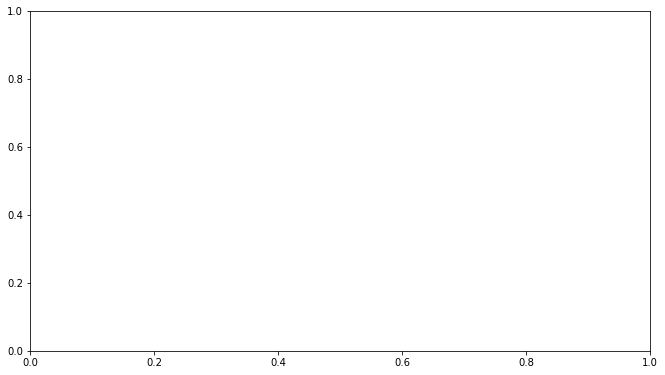

In [14]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(0,6):
    plt.subplot(2,3,i+1)
    x = np.arange(1,17)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope_x1[i]
    
    # Seasonal
    #y_seasons = slope_seasons_x1[i]
    #standard_error_slope_seasons = np.array(standard_error_slope_seasons_x1)
    #y_error_seasons_x1 = standard_error_slope_seasons_x1
    #y_error_seasons = y_error_seasons_x1[i]
    

    # Monthly
    standard_error_slope_x1 = np.array(standard_error_slope_x1)
    y_error = standard_error_slope_x1*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    #plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    #plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    #plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    #plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='solid',linewidth=0.5)
    #plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_LR2_1.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

In [ ]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(6,12):
    plt.subplot(2,3,i-5)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error1 = standard_error_slope*2
    y_error1 = y_error1[i]


        
    plt.errorbar(x, y, yerr = y_error1,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)

    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
plt.savefig('Loc_slope_mean_daily_temp_prec_2.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [ ]:
fig = plt.figure(figsize=(40, 15))
fig.subplots_adjust(hspace = 0.4, wspace=.3)

for i in range(12,16):
    plt.subplot(2,3,i-11)
    x = np.arange(1,13)
    x_seasons = np.arange(1,13,step = 3)

    # coeffisients
    y =slope[i]
    
    # Seasonal
    y_seasons = slope_seasons[i]
    standard_error_slope_seasons = np.array(standard_error_slope_seasons)
    y_error_seasons = standard_error_slope_seasons
    y_error_seasons = y_error_seasons[i]
    

    # Monthly
    standard_error_slope = np.array(standard_error_slope)
    y_error = standard_error_slope*2
    y_error = y_error[i]


        
    plt.errorbar(x, y, yerr = y_error,fmt='o',markersize=5,capsize=4, color = 'k')
    
    # spring
    plt.axhline(y = (y_seasons[0]- y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[0] + y_error_seasons[0]), xmin = 0.05, xmax = 0.22, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[0], xmin = 0.05, xmax = 0.22, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # summer
    plt.axhline(y = (y_seasons[1]- y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[1] + y_error_seasons[1]), xmin = 0.29, xmax = 0.46, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[1], xmin = 0.29, xmax = 0.46, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # autumn
    plt.axhline(y = (y_seasons[2]- y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[2] + y_error_seasons[2]), xmin = 0.51, xmax = 0.69, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[2], xmin = 0.51, xmax = 0.69, color = 'k', linestyle ='solid',linewidth=0.6)
    
    # winter
    plt.axhline(y = (y_seasons[3]- y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = (y_seasons[3] + y_error_seasons[3]), xmin = 0.78, xmax = 0.96, color = 'r', linestyle ='dotted',linewidth=0.5)
    plt.axhline(y = y_seasons[3], xmin = 0.78, xmax = 0.96, color = 'k', linestyle ='solid',linewidth=0.6)
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel('Slope',fontsize=24)
    plt.ylim(-0.75,0.75)
    plt.axhline(y = 0, linestyle = 'dotted')
 

    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=24)

    plt.title("Location ID " + str(i+1),fontsize = 24)
    
    
    
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Month",fontsize = 28,labelpad=35)
plt.ylabel("b_1 (slope)",fontsize = 28,labelpad=55)
    
plt.savefig('Loc_slope_mean_daily_temp_prec_3.pdf', format='pdf', bbox_inches = 'tight',dpi=1200)

In [ ]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace = 0.3, wspace=.3)

for i in range(0,6):
    plt.subplot(3,2,i+1)
    x= np.arange(-20,20)
    #x = np.arange(1,13)
    y = intercepts[i][3] + slope_x1[i][3]*x + slope_x2[i][3]
    prob = np.exp(y)/(1+np.exp(y))
        
    plt.plot(x, prob, color = 'k')
    
    
    plt.yticks(fontsize=24)
    #plt.xlabel('Month',fontsize=24)
    #plt.ylabel(y)
    plt.ylabel('Pr(Rockfall)',fontsize=24)
    plt.ylim(0,1)
    #plt.axhline(y = 0, linestyle = 'dotted')
 

    #plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'],fontsize=18)

    plt.title("Location " + str(i+1),fontsize = 24)
    plt.close()
plt.savefig('Prob_mean_daily_temp_prec_rockfall.pdf', format='pdf', bbox_inches = 'tight',dpi=2000)

In [ ]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Intercept estimate': [item[i] for item in intercepts],
        'Slope x1': [item[i] for item in slope_x1],
        'Slope x2': [item[i] for item in slope_x2],
        'Slope x3': [item[i] for item in slope_x3],
        'LLR p < 0.05 ': [item[i] for item in significance]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_temp_and_daily_precipitation_summary' + str(i) + '.xlsx')

In [ ]:
# daily mean temperature

locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'SE intercept': [item[i] for item in standard_error_coef],
        'SE x1': [item[i] for item in standard_error_slope_x1],
        'SE x2': [item[i] for item in standard_error_slope_x2],
        'SE x3': [item[i] for item in standard_error_slope_x3]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_mean_temp_and_daily_precipitation_SE' + str(i) + '.xlsx')

In [ ]:
mean_llh_months = np.mean(log_likelihood, axis=0)
mean_llh_months = pd.DataFrame(mean_llh_months)
mean_llh_months.to_excel('Log_likelihood_mean_daily_temp_and_prec' + '.xlsx')

In [ ]:
locations = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(0,12):
    data = {'Location': locations,
        'Log-likelihood':[item[i] for item in log_likelihood]}

    data = pd.DataFrame(data)

    data.to_excel('Logistic_regression_temp_and_precipitation_LogLikelihood' + str(i) + '.xlsx')